In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MSDS25_ Class Data (Responses) - Form Responses 1.csv')

In [3]:
df

,Timestamp,phone_type,undergrad_major,num_cups,sleep_hrs,fav_sports,ds_skills,outdoor_hrs,ai_tools_use,ideal_temp,phone_hrs,music_while_studying,music_genre,num_states,fav_season,study_env,summer_desc
0,8/27/2025 10:05:16,Mac,Applied & Computational Mathematics,0,7,Football,7,2,Often,68,3 hours,Yes,Pop,39,Fall,Dorm,Crazy
1,8/27/2025 10:05:19,Mac,Economics,1-2,7,Soccer,6,1,Sometimes,75,5,Yes,EDM/House,20,Summer,Library,Unreal
2,8/27/2025 10:05:19,Mac,Industrial engineering,1 to 2,6,Basketball,6,3 to 4,Always,68,2 to 3,No,Techno,6,Fall,Home,Amazing
3,8/27/2025 10:05:24,Mac,Economics,1,7,Football,3,2,NaN,70,4,Yes,Rock,43,Spring,Outdoors,Interesting
4,8/27/2025 10:05:27,Mac,Biology,5,8,College football,5,3,Sometimes,65,5,Yes,Country/Folk,15,Fall,Library,Fantastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8/27/2025 11:08:37,Mac,Statistics,100mg of caffeine,6,Men’s volleyball,2,0.5,Sometimes,71,4.5,Yes,Jazz-pop,17,Winter,Room or coffee shop,Adventurous
86,8/27/2025 11:08:37,Mac,Biomedical Engineering,1,7,Basketball,7,2,Often,55,2hr 59min,Yes,Country,13,Fall,coffee shop,chaotic
87,8/27/2025 11:08:42,Mac,Commerce,2,7,Basketball,5,4,Always,75,7,No,R&B,18,Summer,Library,Busy
88,8/27/2025 11:08:44,Mac,Applied Statistics,0,7,NaN,5,1,Sometimes,65,8,Yes,All,16,Summer,"quiet, indoors, sunny",Busy


In [5]:
df['phone_type'] = df['phone_type'].replace('Mac', 'iPhone')


In [7]:
df['undergrad_major'].value_counts()

undergrad_major
Statistics                                                     11
Computer Science                                                6
Economics                                                       6
Applied Statistics                                              4
Commerce                                                        3
Computer Science                                                3
Accounting                                                      2
Applied Statistics and Economics                                2
Public Policy                                                   2
Financial Engineering                                           2
Psychology                                                      2
Biology                                                         2
Cognitive Science                                               1
Biomedical Engineering                                          1
Applied computer science                                    

In [ ]:
df['general_area_of_study'] = df['undergrad_major'].copy()

In [169]:
df['general_area_of_study'].value_counts()

general_area_of_study
Math                   22
Commerce               16
Computer Science       13
Engineering            10
Science                 8
Dual Major              6
Policy                  4
Data Science            4
Humanities              4
Systems Engineering     3
Name: count, dtype: int64

In [168]:
df['general_area_of_study'].replace('Chemical Engineering', 'Engineering', inplace=True)

In [103]:
df['undergrad_major'].replace('Computer science ', 'Computer Science', inplace=True)

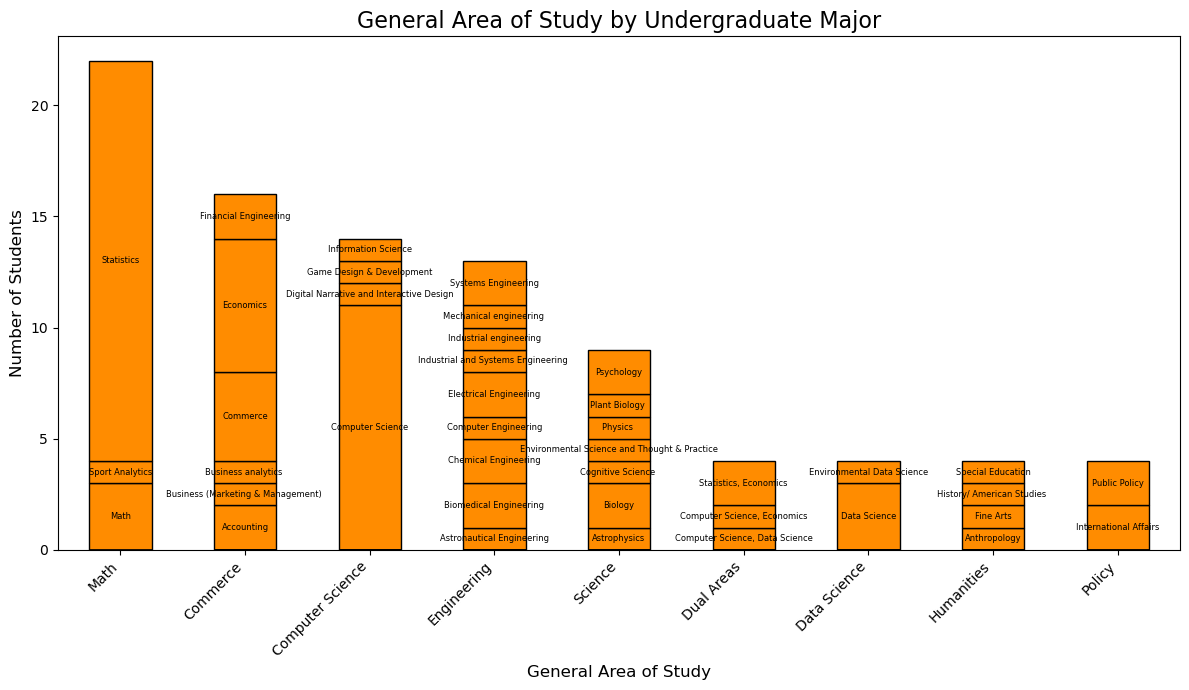

In [282]:
import matplotlib.pyplot as plt
import pandas as pd

# Crosstab
counts = pd.crosstab(df['general_area_of_study'], df['undergrad_major'])

# Sort bars by total height
counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar with dark blue color and black edges
ax = counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color='darkorange',
    edgecolor='black',   # <-- adds borders
    linewidth=1,
    legend=False
)

# Add labels inside bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, container.get_label(), ha='center', va='center', fontsize=6, color='black')

plt.title("General Area of Study by Undergraduate Major", fontsize=16)
plt.xlabel("General Area of Study", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


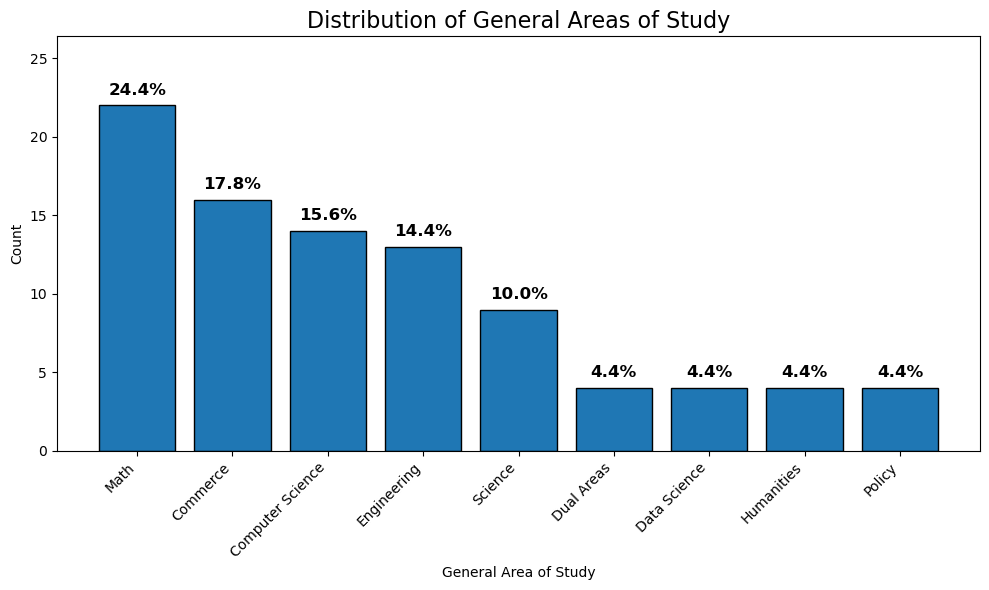

In [428]:
import matplotlib.pyplot as plt

# Count values
counts = df['general_area_of_study'].value_counts()
total = counts.sum()
percentages = (counts / total * 100).round(1)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(counts.index, counts.values, edgecolor='black')

# Add percentages on top of bars
plt.ylim(0, counts.values.max() * 1.2)  # leave space for labels
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{pct}%", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Distribution of General Areas of Study", fontsize=16)
plt.xlabel("General Area of Study")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


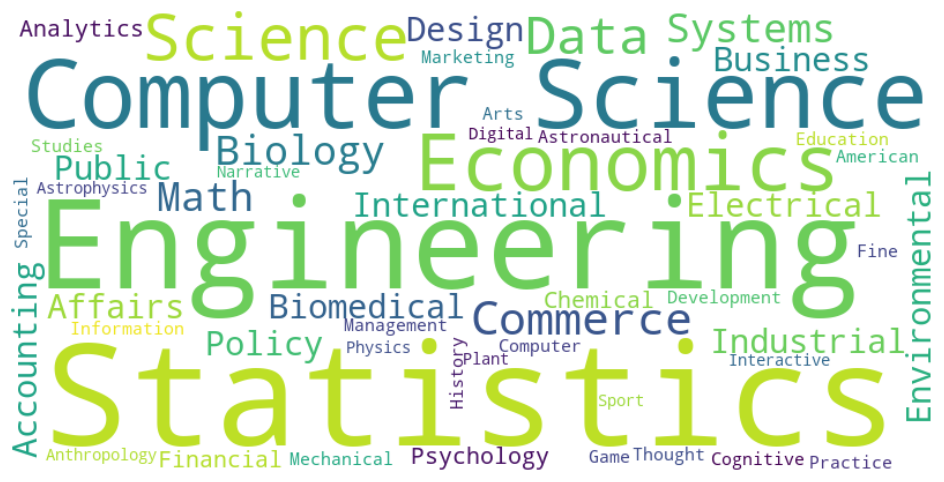

In [372]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all majors into one big string
text = " ".join(df['undergrad_major'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color="white",
                      colormap="viridis").generate(text)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [281]:
df.to_csv('major_cleaned.csv', index=False)

In [264]:
df['undergrad_major'].replace('Applied Statistics, Economics', 'Statistics, Economics', inplace=True)

C:\Users\school\AppData\Local\Temp\ipykernel_47580\337040807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['undergrad_major'].replace('Applied Statistics, Economics', 'Statistics, Economics', inplace=True)


In [271]:
df.loc[
    (df['general_area_of_study'] == "Systems Engineering") & 
    (df['undergrad_major'] == "Industrial and Systems Engineering ") ,
    'general_area_of_study'
] = "Engineering"


In [ ]:
# Find the matching rows
mask = (df['general_area_of_study'] == "Computer Science") & (df['undergrad_major'] == "Computer Science")

# Get the index of the first matching row
idx = df[mask].index[0]

# Update only that one row
df.at[idx, 'undergrad_major'] = "Digital Narrative and Interactive Design"


In [244]:
df.loc[
    (df['undergrad_major'] == "Copmuter Science") &
    (df['general_area_of_study'] == "Computer Science") &
    (df['fav_sports'] == "basketball ") &
    (df['outdoor_hrs'] == ""),
    'undergrad_major'
] = "Digital Narrative and Interactive Design"


In [2]:
df = pd.read_csv('major_cleaned.csv')

In [4]:
import pandas as pd

# Ensure Timestamp is a datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Define sessions
def assign_session(ts):
    if pd.isna(ts):
        return None
    if ts.hour == 10:   # between 10:00 and 10:59
        return "Session 1"
    elif ts.hour == 11: # between 11:00 and 11:59
        return "Session 2"
    else:
        return None  # or "Other" if you want to track outside times

df['class_session'] = df['Timestamp'].apply(assign_session)


In [11]:
df['sleep_hrs'].value_counts()

sleep_hrs
7                         31
8                         23
6                          7
9                          6
7-8                        3
8-10                       2
4                          2
6-7                        2
8.5                        2
10                         1
6-8                        1
8h                         1
6.5                        1
6,7                        1
Not enough.                1
6-7:30                     1
Not enough 🥺 maybe 4-6     1
7-9                        1
5.5                        1
7.5                        1
7 hours                    1
Name: count, dtype: int64

In [8]:
import pandas as pd
import re
import numpy as np

def parse_num_cups(val):
    if pd.isna(val):
        return None, None, None

    s = str(val).strip().lower()

    # Direct numeric (int or float)
    try:
        num = float(s)
        return num, num, num
    except ValueError:
        pass

    # Handle ranges like "1-2" or "0-1"
    if re.match(r'^\d+(\.\d+)?\s*-\s*\d+(\.\d+)?$', s):
        lo, hi = re.split(r'-', s)
        lo, hi = float(lo.strip()), float(hi.strip())
        return lo, hi, (lo + hi) / 2

    # Handle "1 to 2"
    if re.match(r'^\d+(\.\d+)?\s*to\s*\d+(\.\d+)?$', s):
        lo, hi = re.split(r'to', s)
        lo, hi = float(lo.strip()), float(hi.strip())
        return lo, hi, (lo + hi) / 2

    # Handle word "one"
    if "one" == s:
        return 1, 1, 1

    # Handle known text cases
    if "2 (coffee)" in s or "2.5" in s:
        return 2.5, 2.5, 2.5
    if "4 cups" in s:
        return 4, 4, 4
    if "100mg" in s:
        return 1, 1, 1  # ambiguous caffeine unit
    if "usually 0" in s:
        return 0, 1, 0.5
    if "soda girl" in s:  # vague, treat as 0
        return 0, 0, 0

    # Catch all: return None
    return None, None, None

# Apply cleaning
df[['min_num_cups', 'max_num_cups', 'avg_num_cups']] = df['num_cups'].apply(
    lambda x: pd.Series(parse_num_cups(x))
)


In [9]:
df.to_csv('cups_cleaned.csv', index=False)

In [13]:
import re
import numpy as np
import pandas as pd

def parse_sleep(val):
    if pd.isna(val):
        return None, None, None

    s = str(val).strip().lower()

    # Direct numeric (int or float)
    try:
        num = float(s)
        return num, num, num
    except ValueError:
        pass

    # Handle decimals like "8.5", "6.5", "7.5"
    if re.match(r'^\d+(?:\.\d+)?$', s):
        num = float(s)
        return num, num, num

    # Handle simple ranges like "7-8", "8-10", "6-8", "7-9"
    if re.match(r'^\d+(?:\.\d+)?\s*-\s*\d+(?:\.\d+)?$', s):
        lo, hi = re.split(r'-', s)
        lo, hi = float(lo.strip()), float(hi.strip())
        return lo, hi, (lo + hi) / 2

    # Handle "Xh" or "X hours"
    if re.match(r'^\d+(?:\.\d+)?\s*h(ours)?$', s):
        num = float(re.findall(r'\d+(?:\.\d+)?', s)[0])
        return num, num, num

    # Handle comma-separated like "6,7"
    if re.match(r'^\d+(?:\.\d+)?\s*,\s*\d+(?:\.\d+)?$', s):
        nums = [float(x) for x in s.split(',')]
        return min(nums), max(nums), np.mean(nums)

    # Handle "6-7:30" → 6 to 7.5
    if "7:30" in s:
        return 6, 7.5, (6+7.5)/2

    # Handle vague answers
    if "not enough" in s and "4-6" in s:
        return 4, 6, 5
    if "not enough" in s:
        return None, None, None  # too vague

    # Catch all → None
    return None, None, None

df[['min_sleep_hrs', 'max_sleep_hrs', 'avg_sleep_hrs']] = df['sleep_hrs'].apply(
    lambda x: pd.Series(parse_sleep(x))
)



In [16]:
df['avg_sleep_hrs'].value_counts()

avg_sleep_hrs
7.00     33
8.00     25
9.00      8
6.00      7
7.50      4
6.50      4
4.00      2
8.50      2
10.00     1
6.75      1
5.00      1
5.50      1
Name: count, dtype: int64

In [17]:
df.to_csv('sleep_cleaned.csv', index=False)

In [53]:
df.columns

Index(['Timestamp', 'phone_type', 'undergrad_major', 'num_cups', 'sleep_hrs',
       'fav_sports', 'ds_skills', 'outdoor_hrs', 'ai_tools_use', 'ideal_temp',
       'phone_hrs', 'music_while_studying', 'music_genre', 'num_states',
       'fav_season', 'study_env', 'summer_desc', 'general_area_of_study',
       'class_session', 'min_num_cups', 'max_num_cups', 'avg_num_cups',
       'min_sleep_hrs', 'max_sleep_hrs', 'avg_sleep_hrs'],
      dtype='object')

In [31]:
import pandas as pd
import numpy as np

# Example mapping for single-sport standardization
single_sport_map = {
    "Basketball": "Basketball",
    "basketball": "Basketball",
    
    "Football": "Football",
    "NFL Football": "Football",

    "Soccer": "Soccer",
    "soccer": "Soccer",

    "Baseball": "Baseball",
    "Tennis": "Tennis",
    
    "Hockey": "Hockey",
    "hockey (if i ever watch sports)": "Hockey",

    "Formula 1": "Formula 1",
    "F1": "Formula 1",
    "formula 1": "Formula 1",

    "Track & Field": "Track & Field",
    "Track n field": "Track & Field",

    "Snooker": "Snooker",
    "Golf": "Golf",
    "Volleyball": "Volleyball",
    "Men’s volleyball": "Volleyball",

    "Hurling": "Hurling",
    "Cornhole": "Cornhole",
    "Olympic Women’s Gymnastics": "Olympic Women’s Gymnastics",
    "Supercross": "Supercross",
}

# Values that should become None
none_values = {
    "I don’t usually watch sports",
    "None I watch reality tv",
    "I rarely watch TV but enjoy video games 😁",
    np.nan
}

def clean_sports(val):
    if pd.isna(val):
        return None
    
    # Normalize spacing/case
    v = str(val).strip()

    # Handle None-like responses
    if v in none_values:
        return None

    # Handle multi-sports with "or", "and"
    if " or " in v.lower() or " and " in v.lower():
        parts = (
            v.replace("(close)", "")
             .replace(" or ", ",")
             .replace(" and ", ",")
             .split(",")
        )
        cleaned_parts = []
        for p in parts:
            p = p.strip()
            if p in single_sport_map:
                cleaned_parts.append(single_sport_map[p])
            elif p:  # keep unknowns as-is
                cleaned_parts.append(p)
        return cleaned_parts if cleaned_parts else None

    # Single-value mapping
    if v in single_sport_map:
        return single_sport_map[v]

    # Fallback: leave value as-is
    return v

# Apply cleaning
df["fav_sports"] = df["fav_sports"].apply(clean_sports)


In [38]:
def fix_beach_volleyball(val):
    if isinstance(val, list):
        return ["Volleyball" if s.lower() == "beach volleyball" else s for s in val]
    return val

df['fav_sports'] = df['fav_sports'].apply(fix_beach_volleyball)


In [40]:
df.to_csv('sport_cleaned.csv', index=False)

In [43]:
df['ds_skills'].value_counts()

ds_skills
6         19
5         13
7         12
8         12
3          8
4          6
6.5        5
2          5
7.5        3
1          2
10         2
9          2
3 or 4     1
Name: count, dtype: int64

In [44]:
df['ds_skills'] = df['ds_skills'].replace('3 or 4', '3.5')

In [45]:
#change ds_skills to numeric
df['ds_skills'] = pd.to_numeric(df['ds_skills'], errors='coerce')

In [50]:
import re
import numpy as np

def clean_outdoor_hrs(val):
    if pd.isna(val):
        return np.nan
    
    s = str(val).strip().lower()

    # Handle obvious "no outdoors" style answers
    if "few" in s or "possible" in s:
        return 0.0

    # Remove units like "h", "hour", "hours", "ish"
    s = re.sub(r"(hours?|h|ish)", "", s).strip()

    # Handle comma or "to" ranges (like "1,2", "3 to 4")
    if "-" in s or "to" in s or "," in s:
        parts = re.split(r"[-to,]", s)
        try:
            nums = [float(p.strip()) for p in parts if p.strip() != ""]
            return sum(nums) / len(nums) if nums else np.nan
        except:
            return np.nan

    # Try converting directly
    try:
        return float(s)
    except:
        return np.nan

df['outdoor_hrs'] = df['outdoor_hrs'].apply(clean_outdoor_hrs)


In [52]:
df.to_csv('outdoor_cleaned.csv', index=False)

In [55]:
# Standardize capitalization
df['ai_tools_use'] = df['ai_tools_use'].str.strip().str.capitalize()


In [58]:
import re
import numpy as np

def clean_ideal_temp(val):
    if pd.isna(val):
        return np.nan

    s = str(val).strip().lower()

    # Remove units
    s = s.replace("degrees", "").replace("f", "").replace("°", "").strip()

    # Handle ranges like "mid to high 70s" → assume 70-79
    if "mid to high 70s" in s:
        return (75 + 79) / 2  # approximate midpoint

    # Handle simple ranges with "-" or "to"
    if "-" in s or "to" in s:
        parts = re.split(r"[-to]", s)
        try:
            nums = [float(p.strip()) for p in parts if p.strip() != ""]
            return sum(nums) / len(nums) if nums else np.nan
        except:
            return np.nan

    # Try converting directly to float
    try:
        return float(s)
    except:
        return np.nan

# Apply cleaning in-place
df['ideal_temp'] = df['ideal_temp'].apply(clean_ideal_temp)


In [60]:
df.to_csv('temp_cleaned.csv', index=False)

In [63]:
import re
import numpy as np

def parse_time_string(s):
    """Convert messy time strings into decimal hours."""
    s = str(s).lower().strip()
    
    # Handle NA
    if s in ["nan", "", "none"]:
        return np.nan

    # Ranges: "2-3", "2 to 3", "probably 4-6"
    if "-" in s or "to" in s:
        parts = re.split(r"[-to]", s)
        try:
            nums = [float(p.strip().replace("hrs","").replace("h","")) for p in parts if p.strip()]
            return sum(nums)/len(nums) if nums else np.nan
        except:
            return np.nan

    # hh:mm format like "5:45"
    if ":" in s:
        try:
            h, m = s.split(":")
            return float(h) + float(m)/60
        except:
            return np.nan

    # hours and minutes written out
    match = re.match(r"(?:(\d+(?:\.\d+)?)\s*hours?)?\s*(?:and)?\s*(\d+)\s*minutes?", s)
    if match:
        h = float(match.group(1)) if match.group(1) else 0
        m = float(match.group(2))
        return h + m/60

    # e.g. "2hr 59min"
    match = re.match(r"(\d+)\s*hr[s]?\s*(\d+)\s*min", s)
    if match:
        return float(match.group(1)) + float(match.group(2))/60

    # decimal numbers (2.5, 4.5, 1.25)
    try:
        return float(s.replace("hrs","").replace("hr","").replace("h","").replace("hours","").strip())
    except:
        return np.nan

# Apply in place
df["phone_hrs"] = df["phone_hrs"].apply(parse_time_string)


In [78]:
df["music_genre"] = phone_df["music_genre"]


In [187]:
df["music_genre"].value_counts()

music_genre
Pop                                                                       18
Other                                                                     13
Rock                                                                      11
R&B                                                                        9
Country                                                                    8
Alternative                                                                8
Rap                                                                        4
EDM                                                                        4
Hip-Hop                                                                    3
Jazz                                                                       3
[EDM, Other]                                                               1
[Rap, R&B]                                                                 1
[Rap, Rock]                                                     

In [ ]:
#Bluegrass, Regga, Instrumental, 80s Music, Hardcore/punk, Afrobeats to Other

In [185]:
df['music_genre'].replace('Classical piano music and pop music ', '[Other, Pop]', inplace=True)

In [189]:
df['music_genre'].nunique()

18

In [188]:
df.to_csv('music_cleaned.csv', index=False)

In [361]:
df.columns

Index(['Timestamp', 'phone_type', 'undergrad_major', 'num_cups', 'sleep_hrs',
       'fav_sports', 'ds_skills', 'outdoor_hrs', 'ai_tools_use', 'ideal_temp',
       'phone_hrs', 'music_while_studying', 'music_genre', 'num_states',
       'fav_season', 'study_env', 'summer_desc', 'general_area_of_study',
       'class_session', 'min_num_cups', 'max_num_cups', 'avg_num_cups',
       'min_sleep_hrs', 'max_sleep_hrs', 'avg_sleep_hrs'],
      dtype='object')

In [239]:
df["study_env"].value_counts()

study_env
Library                                                      33
Home                                                         25
Coffee Shop                                                  13
[Coffee Shop, Library]                                        4
Outdoors                                                      3
[Academic Building, Home, Library, Coffee Shop]               3
[Coffee Shop, Home]                                           2
Academic Building                                             2
[Academic Building, Outdoors, Library, Coffee Shop]           1
[Library, Academic Building]                                  1
[Library, Home]                                               1
[Academic Building, Home, Outdoors, Library, Coffee Shop]     1
[Academic Building, Home]                                     1
Name: count, dtype: int64

In [238]:
df['study_env'].replace('quiet, indoors, sunny', '[Academic Building, Home, Library, Coffee Shop]', inplace=True)

C:\Users\school\AppData\Local\Temp\ipykernel_28500\3842933957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['study_env'].replace('quiet, indoors, sunny', '[Academic Building, Home, Library, Coffee Shop]', inplace=True)


In [196]:
import re

def clean_study_env(value):
    v = str(value).strip()

    # Leave "or" cases as they are
    if re.search(r'\bor\b', v, flags=re.IGNORECASE):
        return v

    # Library
    if "library" in v.lower():
        return "Library"

    # Coffee shop / cafe
    if "coffee shop" in v.lower() or "cafe" in v.lower():
        return "Coffee Shop"

    # Special exception
    if "anywhere other than my house" in v.lower():
        return v

    # Home / dorm / house / apartment / room / desk / office
    if any(word in v.lower() for word in ["dorm", "home", "house", "apartment", "room", "desk", "office"]):
        return "Home"

    return v

# Apply cleaning
df["study_env"] = df["study_env"].apply(clean_study_env)

# Check cleaned unique values
print(df["study_env"].value_counts())


study_env
Library                                                             33
Home                                                                25
Coffee Shop                                                         13
Outdoors                                                             2
Anywhere other than my house                                         1
coffee shop or my apartment                                          1
Indoor by the window when it’s raining outside                       1
Coffee shop or library                                               1
Academic Building                                                    1
Good chair                                                           1
Student health                                                       1
Library or reading rooms                                             1
my room or the library                                               1
coffee shop or library                                             

In [240]:
df.to_csv('study_cleaned.csv', index=False)

In [330]:
df["summer_desc"].nunique()

30

In [360]:
df["summer_desc"].value_counts()

summer_desc
Relaxing       15
Amazing        13
Busy           10
Fun             9
Chill           6
Productive      6
Adventurous     5
Boring          4
Uneventful      3
Fine            3
Chaotic         3
Reflective      3
Unreal          2
Interesting     2
Fast            2
Hot             2
Depressing      1
Stressful       1
Name: count, dtype: int64

In [359]:
df['summer_desc'].replace('Memorable', 'Fun', inplace=True)

In [362]:
df.to_csv('summer_cleaned.csv', index=False)

In [363]:
# Step 1: overwrite sleep_hrs and num_cups
df["sleep_hrs"] = df["avg_sleep_hrs"]
df["num_cups"] = df["avg_num_cups"]

# Step 2: drop avg columns
df = df.drop(columns=["avg_sleep_hrs", "avg_num_cups"])

# Step 3: reorder columns
cols = list(df.columns)

# desired order adjustments
cols.remove("class_session")
cols.insert(cols.index("Timestamp") + 1, "class_session")

cols.remove("general_area_of_study")
cols.insert(cols.index("undergrad_major") + 1, "general_area_of_study")

cols.remove("min_num_cups")
cols.remove("max_num_cups")
cols.insert(cols.index("num_cups") + 1, "min_num_cups")
cols.insert(cols.index("num_cups") + 2, "max_num_cups")

cols.remove("min_sleep_hrs")
cols.remove("max_sleep_hrs")
cols.insert(cols.index("sleep_hrs") + 1, "min_sleep_hrs")
cols.insert(cols.index("sleep_hrs") + 2, "max_sleep_hrs")

# apply new order
df = df[cols]

# check new structure
print(df.columns)


Index(['Timestamp', 'class_session', 'phone_type', 'undergrad_major',
       'general_area_of_study', 'num_cups', 'min_num_cups', 'max_num_cups',
       'sleep_hrs', 'min_sleep_hrs', 'max_sleep_hrs', 'fav_sports',
       'ds_skills', 'outdoor_hrs', 'ai_tools_use', 'ideal_temp', 'phone_hrs',
       'music_while_studying', 'music_genre', 'num_states', 'fav_season',
       'study_env', 'summer_desc'],
      dtype='object')


In [387]:
df.dtypes

Timestamp                datetime64[ns]
class_session                  category
phone_type                     category
undergrad_major                  object
general_area_of_study          category
num_cups                        float64
sleep_hrs                       float64
min_sleep_hrs                   float64
max_sleep_hrs                   float64
fav_sports                       object
ds_skills                       float64
outdoor_hrs                     float64
ai_tools_use                   category
ideal_temp                      float64
phone_hrs                       float64
music_while_studying             object
music_genre                      object
num_states                        int64
fav_season                     category
study_env                        object
summer_desc                      object
dtype: object

In [369]:
df.to_csv('final_cleaned_class_data.csv', index=False)

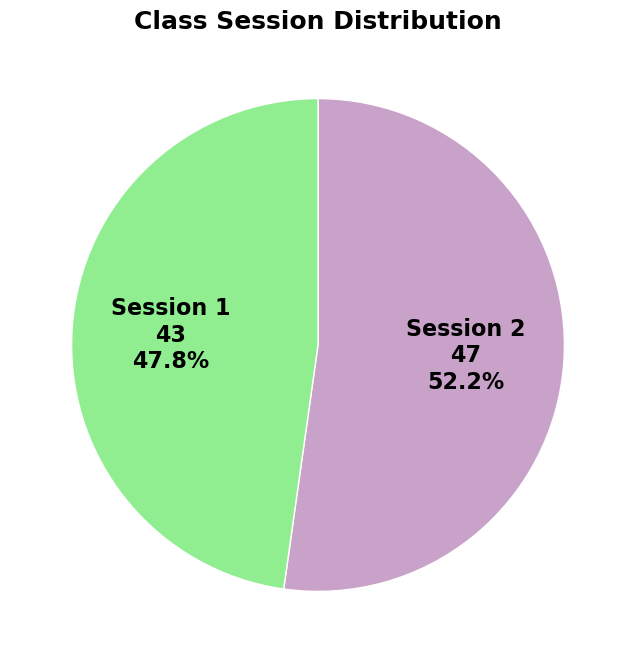

In [376]:
import matplotlib.pyplot as plt

# Count the values
session_counts = df['class_session'].value_counts()

# Custom autopct function
def autopct_with_label(pct, all_vals):
    count = int(round(pct/100.*sum(all_vals)))
    return f"{count}\n{pct:.1f}%"

# Define custom colors
colors = ["#c8a2c8", "#90ee90"]  # light purple, light green

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    session_counts, 
    labels=None,
    autopct=lambda pct: autopct_with_label(pct, session_counts),
    startangle=90, 
    counterclock=False, 
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'white'},
    colors=colors
)

# Replace wedge labels with class_session names
for i, t in enumerate(autotexts):
    t.set_fontsize(16)
    t.set_weight('bold')
    t.set_text(f"{session_counts.index[i]}\n{t.get_text()}")

plt.title("Class Session Distribution", fontsize=18, weight='bold')
plt.show()


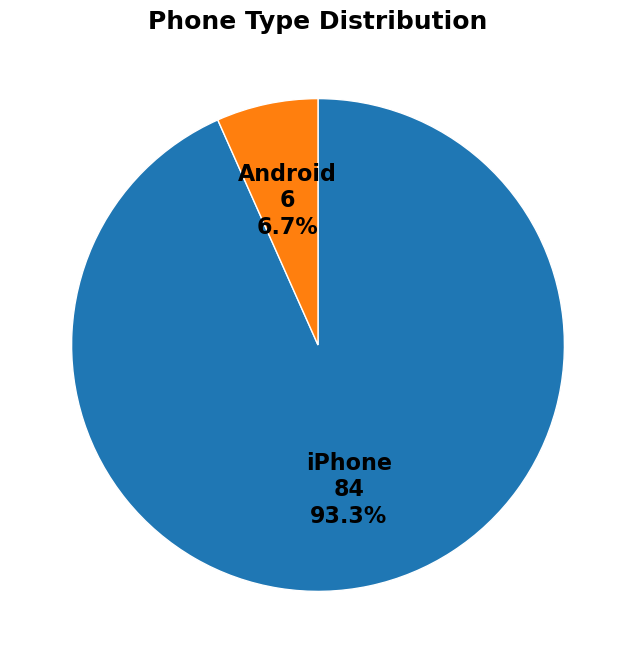

In [377]:
import matplotlib.pyplot as plt

# Count the values
phone_counts = df['phone_type'].value_counts()

# Custom autopct function
def autopct_with_label(pct, all_vals):
    count = int(round(pct/100.*sum(all_vals)))
    return f"{count}\n{pct:.1f}%"

# Use default colors (Matplotlib automatically cycles blue, orange, etc.)
colors = None  

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    phone_counts, 
    labels=None,
    autopct=lambda pct: autopct_with_label(pct, phone_counts),
    startangle=90, 
    counterclock=False, 
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'white'},
    colors=colors
)

# Replace wedge labels with phone_type names
for i, t in enumerate(autotexts):
    t.set_fontsize(16)
    t.set_weight('bold')
    t.set_text(f"{phone_counts.index[i]}\n{t.get_text()}")

plt.title("Phone Type Distribution", fontsize=18, weight='bold')
plt.show()


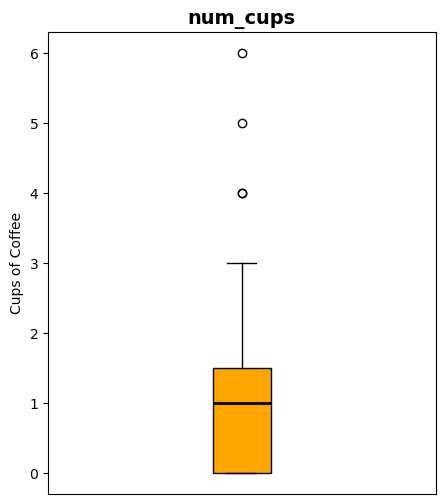

In [388]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
bp = plt.boxplot(df['num_cups'].dropna(), patch_artist=True)

# Color the box orange
for box in bp['boxes']:
    box.set(facecolor='orange')

# Make median line black
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Remove x-ticks
plt.xticks([])

plt.title("num_cups", fontsize=14, weight='bold')
plt.ylabel("Cups of Coffee")
plt.show()


In [385]:
df = df.drop(columns=["min_num_cups", "max_num_cups"])


In [395]:
df.head()

,Timestamp,class_session,phone_type,undergrad_major,general_area_of_study,num_cups,sleep_hrs,fav_sports,ds_skills,outdoor_hrs,ai_tools_use,ideal_temp,phone_hrs,music_while_studying,music_genre,num_states,fav_season,study_env,summer_desc
0,2025-08-27 10:05:16,Session 1,iPhone,Math,Math,0.0,7.0,Football,7.0,2.0,Often,68.0,NaN,Yes,Pop,39,Fall,Home,Unreal
1,2025-08-27 10:05:19,Session 1,iPhone,Economics,Commerce,1.5,7.0,Soccer,6.0,1.0,Sometimes,75.0,5.0,Yes,"[EDM, Other]",20,Summer,Library,Unreal
2,2025-08-27 10:05:19,Session 1,iPhone,Industrial engineering,Engineering,1.5,6.0,Basketball,6.0,3.5,Always,68.0,2.5,No,EDM,6,Fall,Home,Amazing
3,2025-08-27 10:05:24,Session 1,iPhone,Economics,Commerce,1.0,7.0,Football,3.0,2.0,NaN,70.0,4.0,Yes,Rock,43,Spring,Outdoors,Interesting
4,2025-08-27 10:05:27,Session 1,iPhone,Biology,Science,5.0,8.0,Football,5.0,3.0,Sometimes,65.0,5.0,Yes,Country,15,Fall,Library,Amazing


In [391]:
df = df.drop(columns=["min_sleep_hrs", "max_sleep_hrs"])


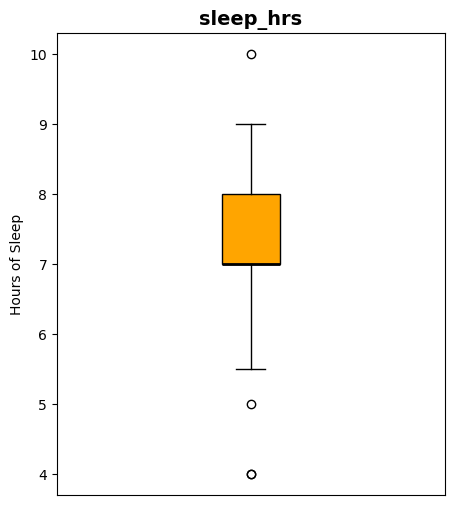

In [393]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
bp = plt.boxplot(df['sleep_hrs'].dropna(), patch_artist=True)

# Color the box blue
for box in bp['boxes']:
    box.set(facecolor='orange')

# Make median line black
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Remove x-ticks
plt.xticks([])

plt.title("sleep_hrs", fontsize=14, weight='bold')
plt.ylabel("Hours of Sleep")
plt.show()


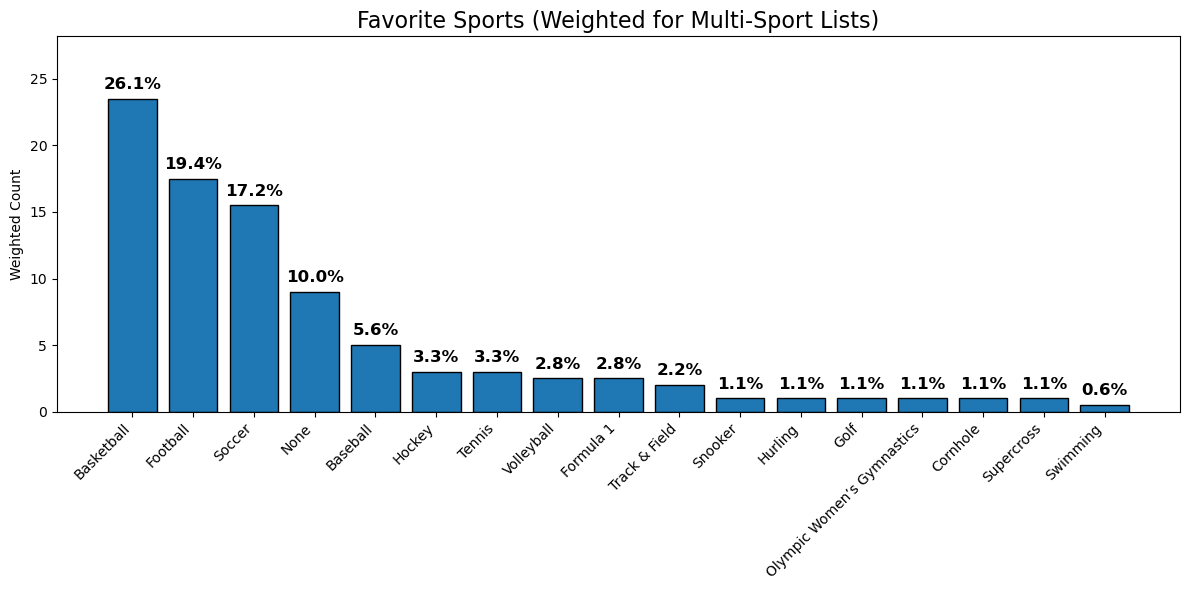

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Function to convert string lists to actual lists
def str_to_list(val):
    if isinstance(val, str) and val.startswith('[') and val.endswith(']'):
        try:
            return ast.literal_eval(val)
        except:
            return [val]
    return [val]  # wrap single values in a list

# Flatten lists (in case of nested lists)
def flatten_list(lst):
    flat = []
    for item in lst:
        if isinstance(item, list):
            flat.extend(item)
        else:
            flat.append(item)
    return flat

# Apply function to fav_sports
df['fav_sports_list'] = df['fav_sports'].apply(str_to_list)
df['fav_sports_list'] = df['fav_sports_list'].apply(flatten_list)

# Count each sport fractionally
sport_counts = {}
for sports in df['fav_sports_list']:
    n = len(sports)
    for sport in sports:
        sport_counts[sport] = sport_counts.get(sport, 0) + 1/n  # fractional count

# Convert to Series for plotting
sport_counts_series = pd.Series(sport_counts).sort_values(ascending=False)
# Replace None with string "None" in index
sport_counts_series.index = sport_counts_series.index.fillna("None")

# Calculate percentages
total = sport_counts_series.sum()
sport_percent = (sport_counts_series / total * 100).round(1)

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(sport_counts_series.index, sport_counts_series.values, edgecolor='black')

# Add percentages on top
plt.ylim(0, sport_counts_series.values.max() * 1.2)  # leave space for labels
for bar, pct in zip(bars, sport_percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{pct}%", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel("Weighted Count")
plt.title("Favorite Sports (Weighted for Multi-Sport Lists)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


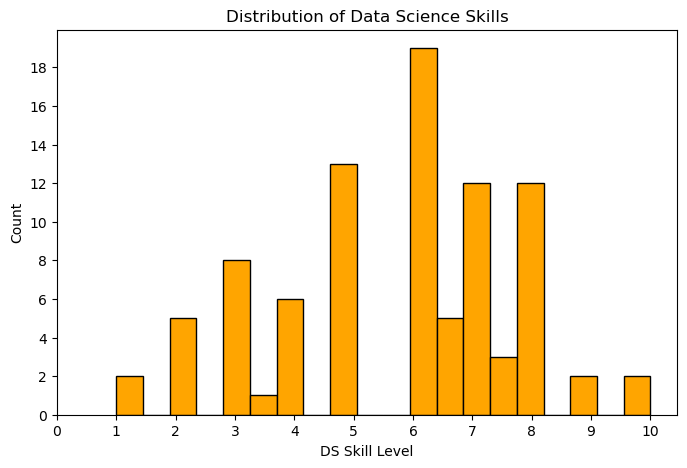

In [413]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(df['ds_skills'].dropna(), bins=20, color='orange', edgecolor='black')
plt.xlabel("DS Skill Level")
plt.ylabel("Count")
plt.title("Distribution of Data Science Skills")
plt.xticks(range(0,11))  # x-ticks for 0-10

# Set y-ticks to even numbers only
max_count = int(np.ceil(df['ds_skills'].value_counts().max()))
plt.yticks(range(0, max_count+1, 2))  # step=2 for even numbers

plt.show()


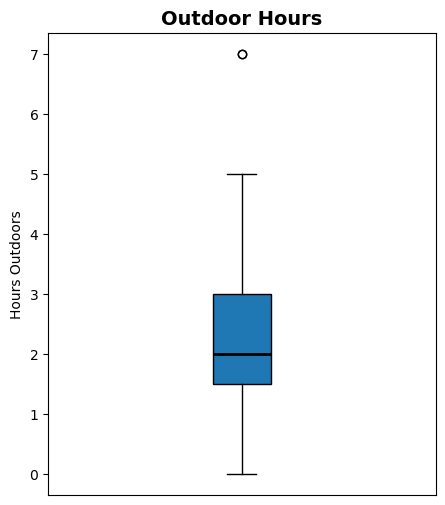

In [415]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
bp = plt.boxplot(df['outdoor_hrs'].dropna(), patch_artist=True)

# Color the box blue


# Make median line black
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Remove x-ticks
plt.xticks([])

plt.title("Outdoor Hours", fontsize=14, weight='bold')
plt.ylabel("Hours Outdoors")
plt.show()


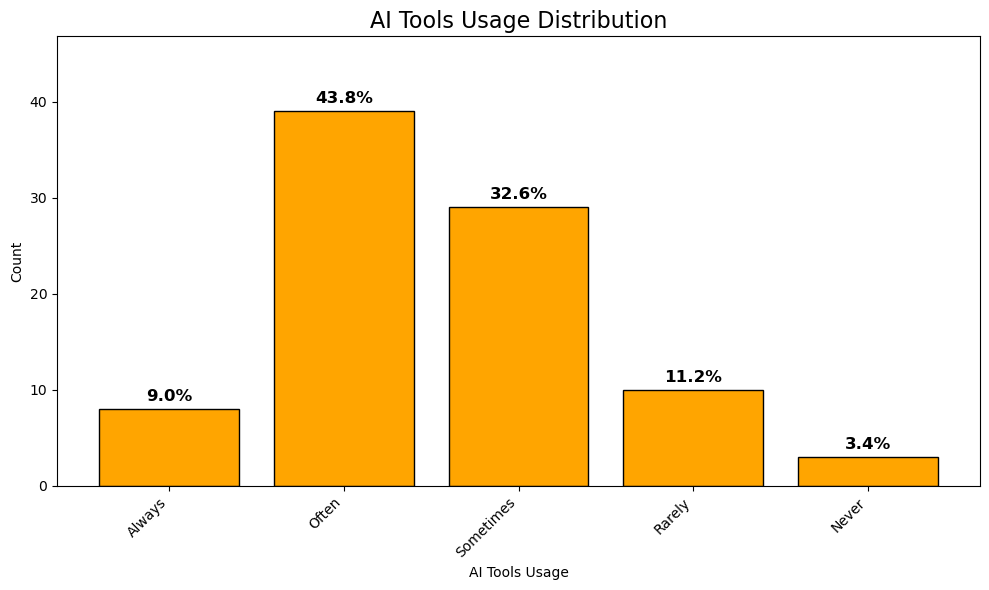

In [423]:
import matplotlib.pyplot as plt

# Define the desired order
order = ["Always", "Often", "Sometimes", "Rarely", "Never"]

# Count each category
ai_counts = df['ai_tools_use'].value_counts()
ai_counts = ai_counts.reindex(order, fill_value=0)

# Calculate percentages
total = ai_counts.sum()
ai_percent = (ai_counts / total * 100).round(1)

# Plot bar chart with bigger figure
plt.figure(figsize=(10,6))
bars = plt.bar(ai_counts.index, ai_counts.values, color='orange', edgecolor='black')

# Adjust y-axis to leave space for percentages
plt.ylim(0, ai_counts.values.max() * 1.2)

# Add percentages on top
for bar, pct in zip(bars, ai_percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{pct}%", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("AI Tools Usage")
plt.ylabel("Count")
plt.title("AI Tools Usage Distribution", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [429]:
df.dtypes

Timestamp                datetime64[ns]
class_session                  category
phone_type                     category
undergrad_major                  object
general_area_of_study          category
num_cups                        float64
sleep_hrs                       float64
fav_sports                       object
ds_skills                       float64
outdoor_hrs                     float64
ai_tools_use                   category
ideal_temp                      float64
phone_hrs                       float64
music_while_studying             object
music_genre                      object
num_states                        int64
fav_season                     category
study_env                        object
summer_desc                      object
fav_sports_list                  object
dtype: object